In [84]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

In [1]:
def get_range(sample):
    # return tuple with min and max values from the sample
    # if max-min value is too large(bigger than 200), divides the segment until it reaches a small value
    a, b = math.floor(min(sample)), math.ceil(max(sample))
    while b - a > 200:
        b /= 2
        a /=2
        
    return (a, b)


In [86]:
def get_partition(sample, step):
    x_min, x_max = get_range(sample)
    n = math.ceil((x_max-x_min) / step)
    
    return [x_min+step*i for i in range(n+1)]

In [87]:
def get_points(boarders, func, step=0.05):
    x = np.arange(boarders[0], boarders[1], step)
    y = func(x)

    return x, y

In [88]:
def discrete_generator(sample_size):
    cases = (
        (stats.poisson, (10, 0), 'Poisson distribution'),
    )
    
    for case in cases:
        yield case[0].rvs(*case[1], sample_size), lambda x: case[0].pmf(x, *case[1]), case[2]

In [89]:
def continuous_generator(sample_size):
    cases = (
        (stats.norm, (0, 1), 'Normal distribution'), 
        (stats.cauchy, (0, 1), 'Cauchy distribution'), 
        (stats.laplace, (0, 1/math.sqrt(2)), 'Laplace distribution'), 
        (stats.uniform, (-math.sqrt(3), 2*math.sqrt(3)), 'Uniform distribution')
    )
    
    for case in cases:
        yield case[0].rvs(*case[1], sample_size), lambda x: case[0].pdf(x, *case[1]), case[2]


In [90]:
def draw_pictures(size):
    for x in continuous_generator(size):
        sample, dist_func, name = x
        fig, ax = plt.subplots(1, 1)

        ax.hist(sample, rwidth = 0.9, density=True, bins=get_partition(sample, 0.5), range=get_range(sample))
        ax.plot(*get_points(get_range(sample), dist_func))

        plt.title(name+' n = '+ str(size))
        plt.xlabel('Values')
        plt.ylabel('Density')
        plt.savefig(name+str(size))

    for x in discrete_generator(size):
        # discrete distribution dont have attribute pdf
        sample, dist_func, name = x
        fig, ax = plt.subplots(1, 1)

        ax.hist(sample, rwidth = 0.9, density=True, bins=get_partition(sample, 1), range=get_range(sample))
        ax.plot(*get_points(get_range(sample), dist_func, step=1))

        plt.title(name+' n = '+ str(size))
        plt.xlabel('Values')
        plt.ylabel('Density')
        plt.savefig(name+str(size))

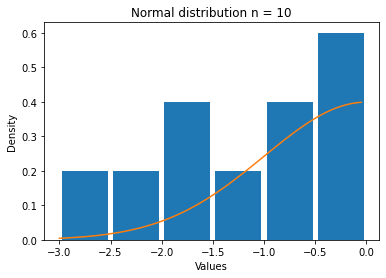

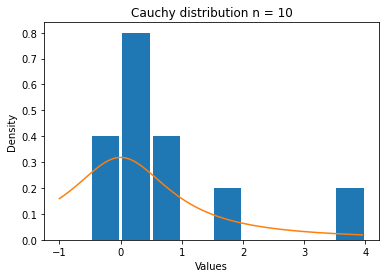

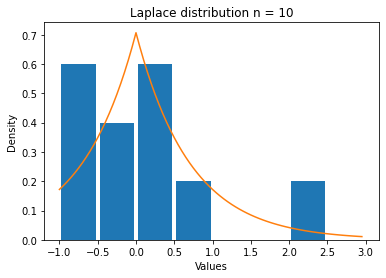

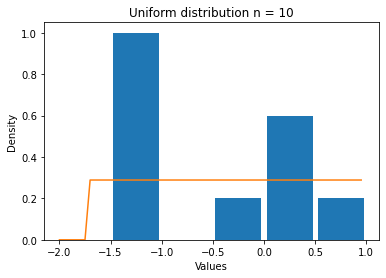

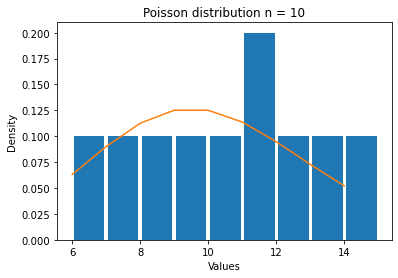

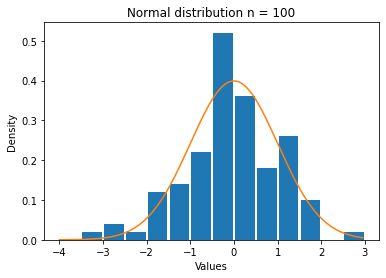

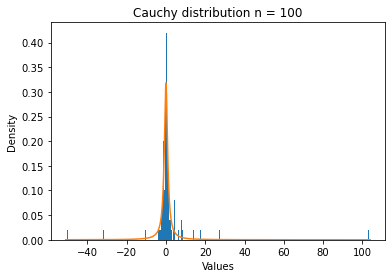

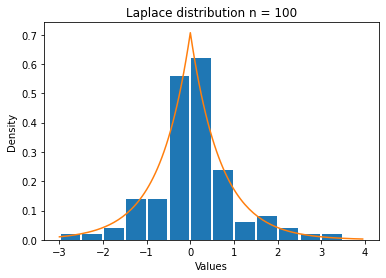

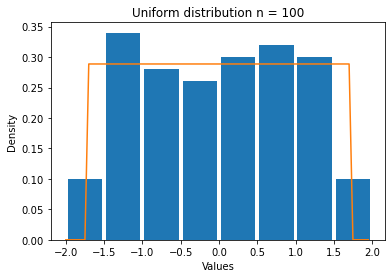

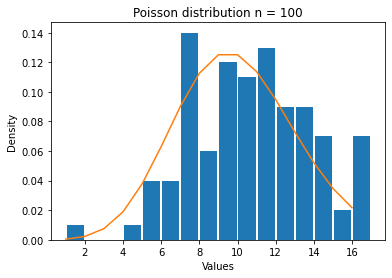

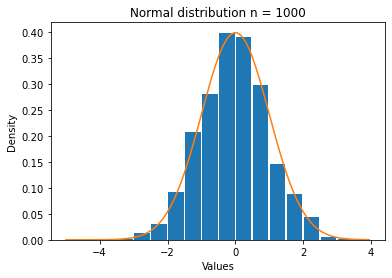

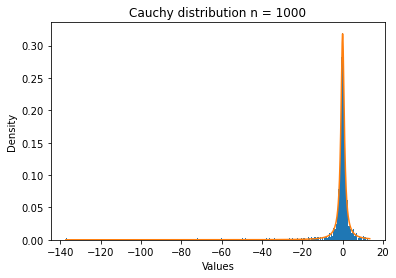

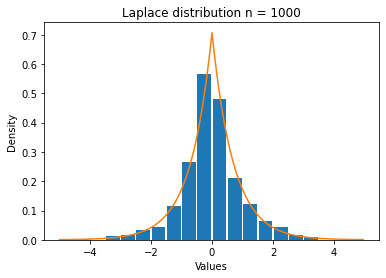

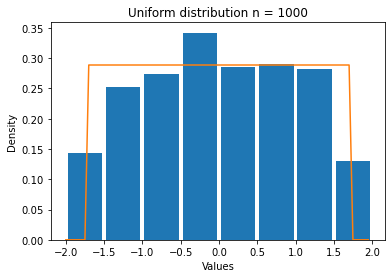

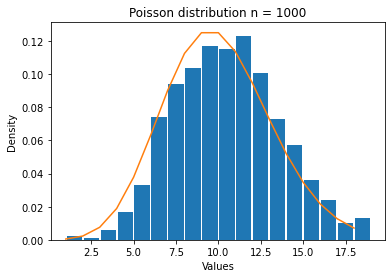

In [91]:
for size in [10, 100, 1000]:
    draw_pictures(size)